### 4.2 Missing data: impact on base statistics & distribution analysis; methods to complete missing data

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(seed=39402270)
from scipy.stats import chi2
from IPython.display import display

from pydataset import data


In [76]:
#available datasets
data().head()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students


#### 1. Data Source:
- The Task 4.2 data source is:
  1. (Example 1): A simple random sample of independent chi-squared (identically) distributed random variables
     - $X \equiv \chi^2(n), n = 3$
     - size: 100000
  2. (Example 2): 
     - pydataset (WWWusage) - Internet Usage per Minute
  3. (Example 3):
     - pydataset (nottem) - Average Monthly Temperatures at Nottingham, 1920-1939

In [77]:
n=3
data1=chi2.rvs(n,size=2000)
data2=data("WWWusage")
data3=data("nottem")

##### 2. Distribution analysis:

In [78]:
def distribution_hist(sample,title="",label="",figsize=(5,3)):
    plt.hist(sample,bins=80,density=True,label=label)
    plt.xlim((-1,15))
    plt.ylim((0,0.5))
    if label:
        plt.legend()
    plt.title(title)
    plt.gcf().set_size_inches(figsize)
    plt.show()

    print("mean =",sample.mean())
    print("var =",sample.std()**2)

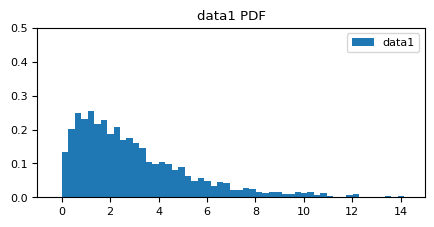

mean = 3.0162959153759736
var = 6.290693820125053


In [79]:
distribution_hist(data1,label="data1",title="data1 PDF",figsize=(5,2.2))

In [80]:
print("data2")
display(data2.info())
display("mean: "+str(data2['WWWusage'].mean()))
display("std: "+str(data2['WWWusage'].std()))

print("\n\ndata3")
display(data3.info())
display("mean: "+str(data3['nottem'].mean()))
display("std: "+str(data3['nottem'].std()))


data2
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 1 to 100
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   time      100 non-null    int64
 1   WWWusage  100 non-null    int64
dtypes: int64(2)
memory usage: 2.3 KB


None

'mean: 137.08'

'std: 39.9994141371237'



data3
<class 'pandas.core.frame.DataFrame'>
Int64Index: 240 entries, 1 to 240
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   time    240 non-null    float64
 1   nottem  240 non-null    float64
dtypes: float64(2)
memory usage: 5.6 KB


None

'mean: 49.03958333333333'

'std: 8.57232434031383'

In [81]:
col2="WWWusage"
col3="nottem"

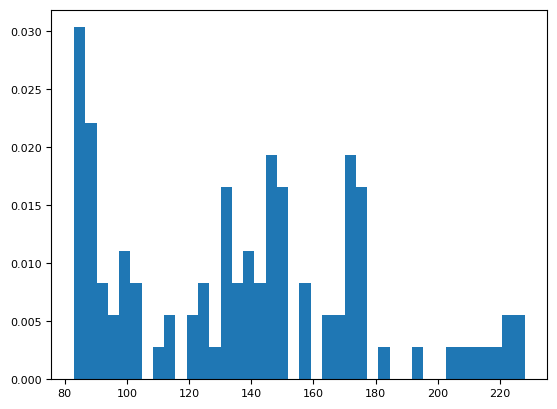

In [82]:
plt.hist(data2[col2],bins=40,density=True)
plt.show()

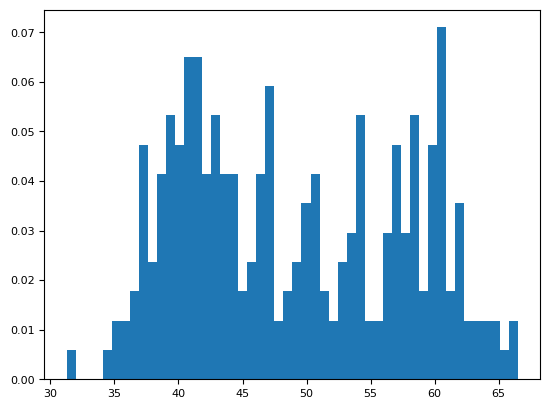

In [83]:
plt.hist(data3[col3],bins=50,density=True)
plt.show()

##### 2. Research purpose:
- Example 1:
    1. Show impact of missing data on base statistics (when the distribution of the data is known)
    2. Choose methods to complete missing data
    3. Perform distribution analysis on the initial dataset vs a dataset with missing data, that was filled; Compare the results
- Examples 2 & 3: (the distribution of the data is unknown)
    1. Choose different methods to complete the missing data 
        - The goal is to fill in the missing data with minimum impact on the sample distribution
    2. Fill in the data, display base statistics values
    3. Choose methods that fill the missing data with minimum impact on its distribution function
    4. Conclusions


##### Example 1:  Model definition:
Model: $(X,\{P_{n}, n \in N\})$:
   - X = $[ 0, +\infty)$
   - $n = 3$; $N = \mathbb{N}$
   - $P_{n} \equiv \chi^2\space(n)$

##### Example 2:  Model definition:
Model: $(X,\{P_\theta, \theta \in \Theta\})$:
   - $\text{X: sample values}$
   - $\theta - ?, \Theta - ?$
   - $P_\theta: \text{empirical CDF}$

##### Example 2:  Model definition:
Model: $(X,\{P_\theta, \theta \in \Theta\})$:
   - $\text{X: sample values}$
   - $\theta - ?, \Theta - ?$
   - $P_\theta: \text{empirical CDF}$

In [84]:
n = 3

In [85]:
#apply function to all sample elements
def corrupt_data(sample,fun):
    #fun = function of sample & element index
    return np.array([fun(sample,i) for i in range(len(sample))],dtype=float)

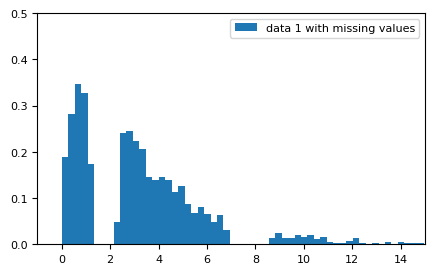

mean = 3.1994360002949565
var = 7.029876068726041
null values count: 578


In [86]:
from random import random
fun1=lambda sample,i: sample[i] if not len(sample)//4<i<len(sample)//2 else None
fun2=lambda sample,i: sample[i] if not len(sample)//25*23<i<len(sample)//25*24 else None
data1missing=corrupt_data(corrupt_data(sorted(data1),fun1),fun2)
null_count=sum(np.isnan(data1missing))
data1missing_nonnull=data1missing[~np.isnan(data1missing)]
distribution_hist(data1missing_nonnull,label="data 1 with missing values")
print("null values count:",null_count)

Below a brief description of the methods that are used for filling in the missing data is provided:
- Mean imputation: replace null values with the sample mean
- Interpolation: based on the definition of a polynomial of natural order n which contains a given set of points (x1,y1), (x2,y2), ..., (x_n, y_n); (a certain point can be chosen as follows: (x = a particular value of the sample, y = count of values equal to x (with specified precision eps))
- Linear interpolation: equivalent to the Interpolation method, where polynomial order is equal to 1;
- Quadratic interpolation: similar definition to the previous method
- Spline: A piecewise-defined polynomial is used, the idea is similar to the Interpolation method.
- From_derivatives: 
    - description reference: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html
    - Construct a piecewise polynomial in the Bernstein basis
    - https://en.wikipedia.org/wiki/Bernstein_polynomial
- Krogh interpolator:
    - The polynomial passes through all the pairs (xi,yi). One may additionally specify a number of derivatives at each point xi; this is done by repeating the value xi and specifying the derivatives as successive yi values.
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.KroghInterpolator.html#scipy.interpolate.KroghInterpolator
- Akima interpolator:
    - Fit piecewise cubic polynomials, given vectors x and y. The interpolation method by Akima uses a continuously differentiable sub-spline built from piecewise cubic polynomials. The resultant curve passes through the given data points and will appear smooth and natural.
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.Akima1DInterpolator.html#scipy.interpolate.Akima1DInterpolator
- Pad: Fill the missing values using existing values


In [87]:

def mean_imputation(sample):
    sample=pd.Series(sample)
    return sample.fillna(sample.mean())

def interpolation(sample,method='linear',kw={}):
    sample=pd.Series(sample)
    return sample.interpolate(method=method, limit_direction='forward', axis=0,**kw)

def interpolation_linear(sample):
    return interpolation(sample,method='linear')
    

In [88]:
#find missing values in a data vector:
# for x_i, x_i+1 - dataset values, eps - precision
# if |x_i+1-x_i|>eps, then between x_i, x_i+1 there are [|x_i+1-x_i|/eps] missing values to fill
def find_missing_values(data:pd.Series,dtype=None,eps=1):
    d=data.sort_values()
    value_iter=None
    new_arr=[]
    
    for val in d:
        if val is None:
            continue
        if value_iter is None:
            value_iter=val
            new_arr.append(value_iter)
            continue
        if val-value_iter>eps:
            new_arr+=[None]*int((val/eps-value_iter/eps-eps))
        new_arr.append(val)
        value_iter=val
    return pd.Series(new_arr,dtype=dtype)

In [89]:
data2.head()

,time,WWWusage
1,1,88
2,2,84
3,3,85
4,4,85
5,5,84


In [90]:
#epsilon=1 because [nottem] values are int values with precision 1
data2missing=find_missing_values(data2[col2],eps=1)
data2missing

0       83.0
1       84.0
2       84.0
3       84.0
4       84.0
       ...  
184      NaN
185      NaN
186    226.0
187      NaN
188    228.0
Length: 189, dtype: float64

In [91]:
data3.head()

,time,nottem
1,1920.000000,40.6
2,1920.083333,40.8
3,1920.166667,44.4
4,1920.250000,46.7
5,1920.333333,54.1


In [92]:
#epsilon=0.1 because [nottem] values are float values with the precision 0.1
data3missing=find_missing_values(data3[col3],eps=0.1)

In [93]:
from math import ceil
#methods for filling in the missing data:
methods = [
    # linear interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation_linear(data),
    # mean imputation (parameters: sample, additional arguments)
    lambda data,args: mean_imputation(data),
    # regular interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation(data,method='polynomial',kw=args),
    # quadratic interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation(data,method='quadratic'),
    # spline interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation(data,method='spline',kw=args),
    # Bernstein polynomial interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation(data,method='from_derivatives'),
    # Krogh interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation(data,method='nearest'),
    # Akima interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation(data,method='akima'),
    # pad interpolation (parameters: sample, additional arguments)
    lambda data,args: interpolation(data,method='pad')
]
sub_titles=[
    "linear interpolation",
    "mean inputation",
    "polynomial interpolation",
    "quadratic interpolation",
    "spline ",
    "from_derivatives",
    "krogh",
    "akima",
    "pad"
]

#matplotlib figures
def get_figures(size,figsize):
    fig,ax=plt.subplots(*size,figsize=figsize)
    return fig,ax,ax.reshape(1,size[0]*size[1])

#plot missing values fill methods
def plot_mvals_fill_methods(data_mvals,title="",figsize=(5,3),fontsize=6,skip=None,additional_args=None,hist_args=None):
    # data: pd.Series that contains missing (None) values
    global methods,sub_titles
    if skip is None:
        skip=dict()
    if additional_args is None: additional_args=dict()
    if hist_args is None: hist_args=dict()
    s=ceil(len(methods)**0.5)
    size=(s,s)
    fig,_ax,ax_vector=get_figures(size,figsize)
    plt.rc('font',size=fontsize)
    ax_vector=ax_vector[0]
    for i in range(len(methods)):
        if i+1 in skip:
            continue
        args=additional_args.get(i+1,dict())
        h_args=hist_args.get(i+1,{"bins":50})
        fill=methods[i]
        ttl=title+sub_titles[i]
        ax=ax_vector[i]
        plt.gcf()
        X=fill(data_mvals,args)
        ax.hist(X,label="filled values",**h_args)
        if 'color' in h_args:
            del h_args['color']
        ax.hist(data_mvals,label="data",**h_args)
        ax.set_xlabel("",fontsize=fontsize)
        ax.set_ylabel("",fontsize=fontsize)
        ax.set_title(ttl,fontsize=fontsize)
        ax.legend()

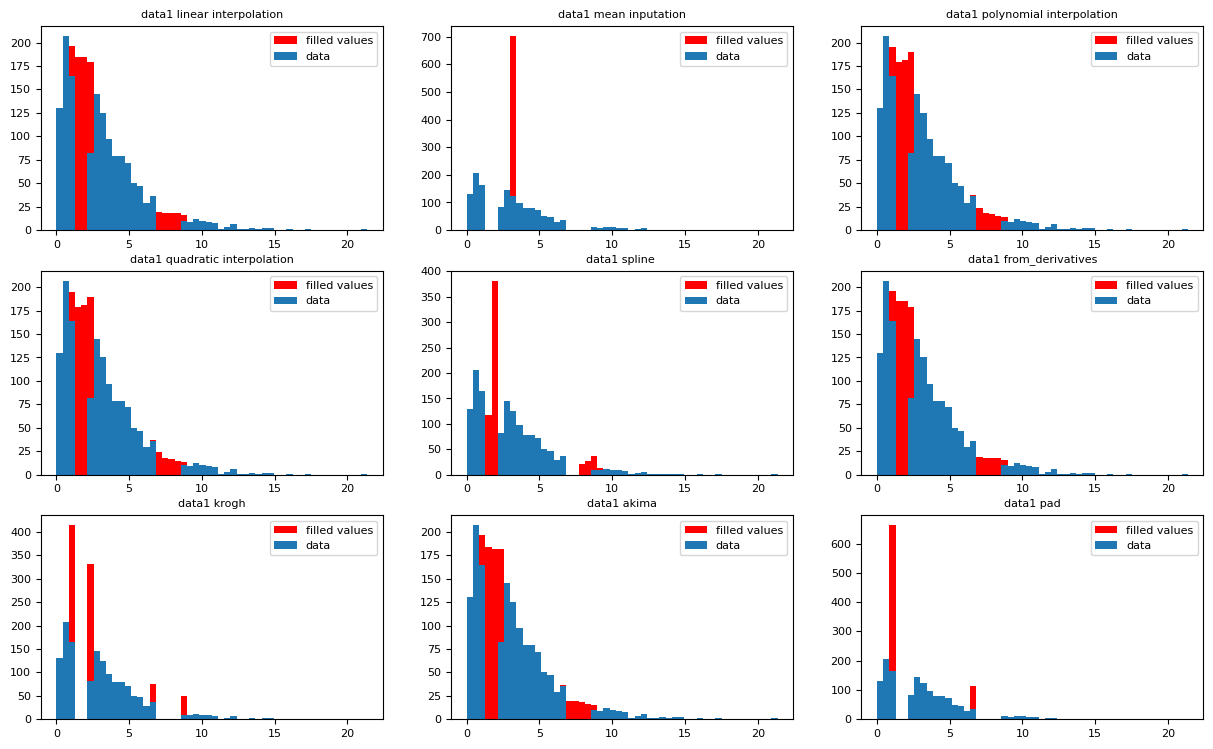

In [94]:
#Example 1
c="red"
plot_mvals_fill_methods(data1missing,figsize=(15,9),title='data1 ',fontsize=8,additional_args={
    3:{'order':2},
    5:{'order':3}
},hist_args={
    1:{"color":c,"bins":50},
    2:{"color":c,"bins":50},
    3:{"color":c,"bins":50},
    4:{"color":c,"bins":50},
    5:{"color":c,"bins":50},
    6:{"color":c,"bins":50},
    7:{"color":c,"bins":50},
    8:{"color":c,"bins":50},
    9:{"color":c,"bins":50},
})

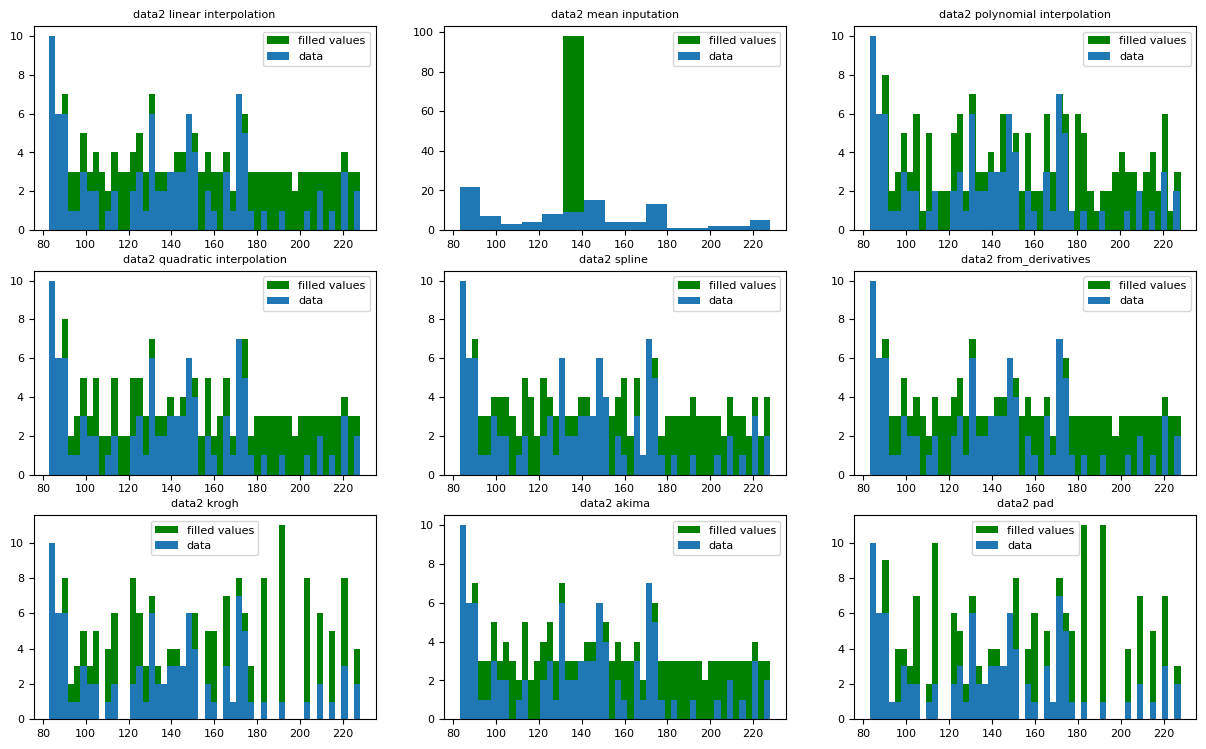

In [95]:
#Example 2
c="green"
plot_mvals_fill_methods(data2missing,figsize=(15,9),title='data2 ',fontsize=8,additional_args={
    3:{'order':5},
    5:{'order':3}
},hist_args={
    1:{"color":c,"bins":50},
    2:{"color":c,"bins":15},
    3:{"color":c,"bins":50},
    4:{"color":c,"bins":50},
    5:{"color":c,"bins":50},
    6:{"color":c,"bins":50},
    7:{"color":c,"bins":50},
    8:{"color":c,"bins":50},
    9:{"color":c,"bins":50},
})

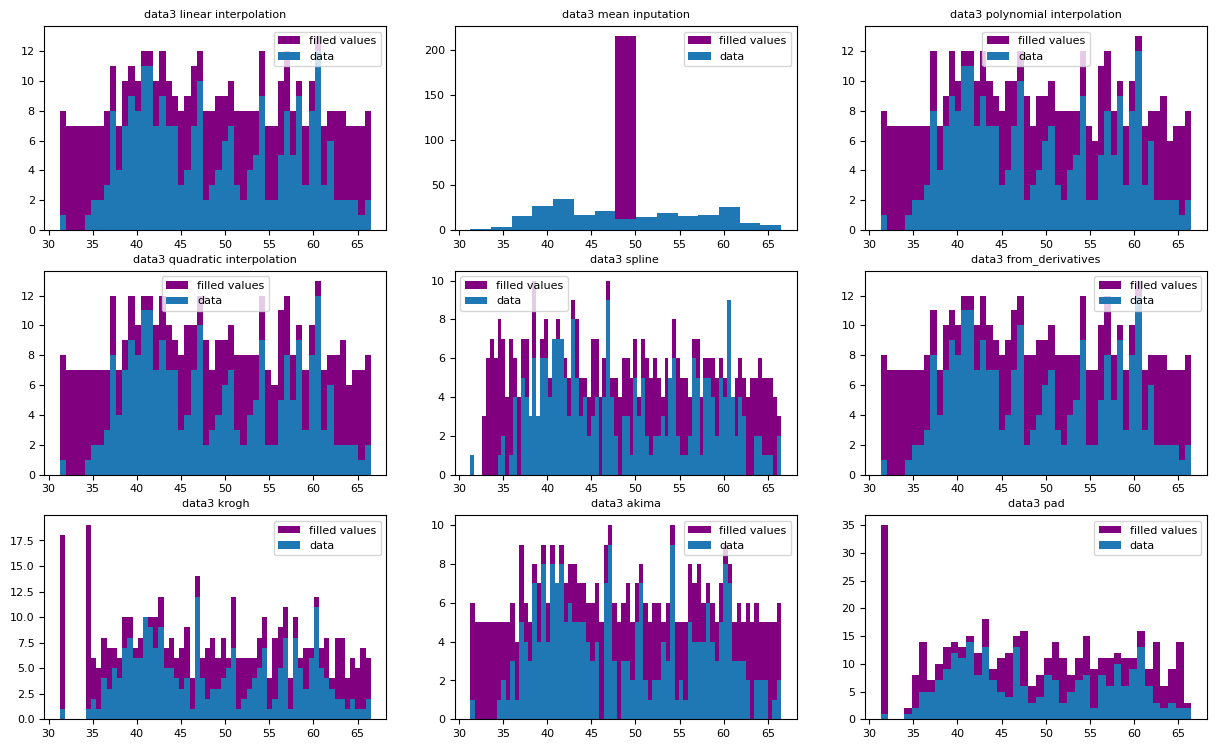

In [96]:
#Example 3
c="purple"
plot_mvals_fill_methods(data3missing,figsize=(15,9),title='data3 ',fontsize=8,additional_args={
    3:{'order':2},
    5:{'order':3}
},hist_args={
    1:{"color":c,"bins":50},
    2:{"color":c,"bins":15},
    3:{"color":c,"bins":50},
    4:{"color":c,"bins":50},
    5:{"color":c,"bins":80},
    6:{"color":c,"bins":50},
    7:{"color":c,"bins":60},
    8:{"color":c,"bins":70},
    9:{"color":c,"bins":40},
})

The question arises: how to determine the best method for filling in the missing values for a particular dataset?

Below we define a set of methods that can be used to solve this problem
- Comparison of base statistics (mean/variance/skewness/kurtosis/...)
- Moments comparison (EX,EX^2,EX^3,...)
- Differencing positional statistics
- ...


Best method is chosen for each test according to the statistics function:
  - $S(X_1, X_2) $ (samples) -> moments comparison of $X_1, X_2 $ (absolute difference) + base stats comparison of $X_1, X_2$ (absolute difference), where:
      - $X_1$ - original sample
      - $X_2$ - sample with filled values
  - The best method to fill in the missing values has the minimum value $S(X_1, X_2)$ (the task is equivalent to the minimization of $S(X_1, X_2)$)

In [97]:
def expected_value(sample,fun):
    _sum=0
    for x in sample:
        _sum+=fun(x)
    return _sum/len(sample)

# moments comparison of X1,X2
def compare_moments(data1,data2,order=3):
    assert order<10
    data1_moments=[expected_value(data1,lambda x: pow(x,i)) for i in range(1,order+1)]
    data2_moments=[expected_value(data2,lambda x: pow(x,i)) for i in range(1,order+1)]
    return sum(abs(data1_moments[i]-data2_moments[i])**(1/(i+1)) for i in range(order))
# bast stats comparison of X1,X2
# mean - consistent estimator, efficient, asymptotically normal
# variance - not efficient; n/(n+1)*variance - efficient, where n = len(sample)
# skewness - not efficient, consistent
# kurtosis - not efficient, consistent
def compare_base_stats(data1,data2):
    d1=pd.Series(data1)
    d2=pd.Series(data2)
    stats1=d1.mean(),d1.var(),d1.skew(),d1.kurt()
    stats2=d2.mean(),d2.var(),d2.skew(),d2.kurt()
    return sum(abs(stats1[i]-stats2[i]) for i in range(len(stats1)))

# positional statistics comparison of X1,X2
# (positional statistics are consistent, efficient and asymptotically normal)
def compare_positional_statistics(data1,data2):
    if len(data1)<len(data2):
        data1,data2=data2,data1
    data1,data2=sorted(data1),sorted(data2)
    inc=len(data2)/len(data1)
    return sum(abs(data1[i]-data1[i-1]-data2[round(i*inc)]+data2[round(i*inc)-1])**0.5 for i in range(1,len(data1)))

In [98]:
data2col=data2[col2]
data3col=data3[col3]

In [99]:
#S(t1,t2) where:
# t1 = array(positional stats comparison, base stats comparison, moments comparison) of samples (X1, X2)
# X1 - original values
# X2 - filled values
def is_better_result(t1,t2):
    s01,s02,s03=t1
    s11,s12,s13=t2 
    s1=s02+s03
    s2=s12+s13
    return s1>s2

#analyze null values fill methods
# (for each method display analysis results)
def analyze_nvals_fill_methods(data,data_missing,args_lst,data_name=None):
    global methods
    
    if data_name:
        print(data_name)
        print("\n")
    
    best=None
    best_method=None
    best_method_name=None
        
    for i in range(len(methods)):
        method=methods[i]
        title=sub_titles[i]
        args=args_lst[i]
        data_filled=method(data_missing,args)
        r1=compare_positional_statistics(data_filled,data)
        r2=compare_base_stats(data_filled,data)
        r3=compare_moments(data_filled,data)
        if best is None or is_better_result(best,(r1,r2,r3)):
            best=r1,r2,r3
            best_method=method
            best_method_name=title
            
        print(title)
        print('---')
        print("positional stats result:",r1)
        print("base stats result:",r2)
        print("moments result:",r3)
        print('---\n')
    return best_method,best_method_name

data2filled=interpolation(data2missing,method='polynomial',kw={"order":5})

#Display statistics value (positional stats comparison, absolute difference)
compare_positional_statistics(data2filled,data2col)

176.83651729229248

In [101]:
#Example 1
args_lst=[
    {},
    {},
    {"order":2},#interpolation polynomial maximum order
    {},
    {"order":3},#spline polynomial max order
    {},
    {},
    {},
    {}
]
analyze_nvals_fill_methods(data1,data1missing,args_lst,data_name='data1')

data1


linear interpolation
---
positional stats result: 29.755745697825922
base stats result: 0.09504034181131682
moments result: 1.3188021997730064
---

mean inputation
---
positional stats result: 85.32986310044886
base stats result: 4.409378897279735
moments result: 2.716470129246399
---

polynomial interpolation
---
positional stats result: 29.746483557269094
base stats result: 0.041295837212689035
moments result: 0.8939910098146413
---

quadratic interpolation
---
positional stats result: 29.746483557269094
base stats result: 0.041295837212689035
moments result: 0.8939910098146413
---

spline 
---
positional stats result: 30.88603482353318
base stats result: 0.5959901922833044
moments result: 2.602815290877049
---

from_derivatives
---
positional stats result: 29.755745697825926
base stats result: 0.09504034181131682
moments result: 1.3188021997730064
---

krogh
---
positional stats result: 33.912571286403086
base stats result: 0.2726381193429248
moments result: 1.62260670439496

(<function __main__.<lambda>(data, args)>, 'polynomial interpolation')

In [102]:
#Example 2
args_lst=[
    {},
    {},
    {"order":5},#interpolation polynomial maximum order
    {},
    {"order":3},#spline polynomial maximum order
    {},
    {},
    {},
    {}
]
analyze_nvals_fill_methods(data2col,data2missing,args_lst,data_name='data2')

data2


linear interpolation
---
positional stats result: 161.66571495228598
base stats result: 226.18635417658248
moments result: 167.52349932745904
---

mean inputation
---
positional stats result: 183.07135912658336
base stats result: 759.7206517276783
moments result: 95.57545345175814
---

polynomial interpolation
---
positional stats result: 176.83651729229248
base stats result: 223.97830235376034
moments result: 166.94584665672625
---

quadratic interpolation
---
positional stats result: 169.96985116847588
base stats result: 227.33468742125953
moments result: 167.5391975192129
---

spline 
---
positional stats result: 177.60282508171323
base stats result: 228.8992154604072
moments result: 167.2755965140819
---

from_derivatives
---
positional stats result: 161.66571495228598
base stats result: 226.18635417658248
moments result: 167.52349932745904
---

krogh
---
positional stats result: 177.65196218190613
base stats result: 228.95037521360942
moments result: 166.69548497923822
---

(<function __main__.<lambda>(data, args)>, 'pad')

In [103]:
#Example 3
args_lst=[
    {},
    {},
    {"order":2},#interpolation polynomial maximum order
    {},
    {"order":3},#spline polynomial maximum order
    {},
    {},
    {},
    {}
]
analyze_nvals_fill_methods(data3col,data3missing,args_lst,data_name='data3')

data3


linear interpolation
---
positional stats result: 125.01930073101681
base stats result: 22.184437444022453
moments result: 12.561790330183701
---

mean inputation
---
positional stats result: 133.0052492238565
base stats result: 35.42689022493227
moments result: 22.896832545363544
---

polynomial interpolation
---
positional stats result: 130.9792358846684
base stats result: 22.15449402291548
moments result: 12.557301369758571
---

quadratic interpolation
---
positional stats result: 130.9792358846684
base stats result: 22.15449402291548
moments result: 12.557301369758571
---

spline 
---
positional stats result: 134.4190371078158
base stats result: 19.449494476142505
moments result: 13.371135637873262
---

from_derivatives
---
positional stats result: 125.01930135598833
base stats result: 22.184437444022468
moments result: 12.561790330183701
---

krogh
---
positional stats result: 134.87681109634136
base stats result: 22.32664898379197
moments result: 12.751029717474017
---

a

(<function __main__.<lambda>(data, args)>, 'spline ')

According to the test results, it is now possible to choose the best method for each example:
- Example1: polynomial interpolation (order = 2)
- Example2: pad
- Exmaple3: spline (order = 3)

#### Missing data: Impact on base stats & distribution analysis

##### 1. Impact on base stats

In [40]:
complete=pd.Series(data1)
missing=pd.Series(data1missing_nonnull)

The below test checks whether the difference between base statistics is signifficant on a given level of signifficance
  - signifficance_level:  0.2
  - if statistics value is >= signifficance_level:
     - print("Impact is signifficant")


In [46]:
signifficance_level = 0.15

def prettyprint(v1,v2,subject,name1,name2,s_level,fun):
    print("%s \n  %s:  %s; \n  %s:  %s"%(subject,name1,v1,name2,v2))
    if abs(v1-v2)>s_level:
        fun()
    print()

s=signifficance_level
fun=lambda: print("! Impact is signifficant !")
print("data1:")
prettyprint(complete.mean(),missing.mean(),"Mean value:","complete data","missing data",s,fun)
prettyprint(complete.var(),missing.var(),"Variance value:","complete data","missing data",s,fun)
prettyprint(complete.skew(),missing.skew(),"Skewness value:","complete data","missing data",s,fun)
prettyprint(complete.kurt(),missing.kurt(),"Kurtosis value:","complete data","missing data",s,fun)


data1:
Mean value: 
  complete data:  2.9328930696906617; 
  missing data:  3.1117015806038184
! Impact is signifficant !

Variance value: 
  complete data:  5.567030207031609; 
  missing data:  6.295582928490697
! Impact is signifficant !

Skewness value: 
  complete data:  1.6122968817596934; 
  missing data:  1.4516608941267357
! Impact is signifficant !

Kurtosis value: 
  complete data:  3.8567319427425213; 
  missing data:  3.6240880957799777
! Impact is signifficant !



In [44]:
signifficance_level = [12,12,0.3,0.3]
s=signifficance_level
miss=interpolation(data2missing,method="pad") #best method
comp,miss=pd.Series(data2[col2]),pd.Series(miss)
print("data2:")
prettyprint(comp.mean(),miss.mean(),"Mean value:","complete data","missing data",s[0],fun)
prettyprint(comp.var(),miss.var(),"Variance value:","complete data","missing data",s[1],fun)
prettyprint(comp.skew(),miss.skew(),"Skewness value:","complete data","missing data",s[2],fun)
prettyprint(comp.kurt(),miss.kurt(),"Kurtosis value:","complete data","missing data",s[3],fun)

data2:
Mean value: 
  complete data:  137.08; 
  missing data:  147.54497354497354

Variance value: 
  complete data:  1599.9531313131313; 
  missing data:  1762.7067432173812
! Impact is signifficant !

Skewness value: 
  complete data:  0.3892134436689279; 
  missing data:  0.1280058093243048

Kurtosis value: 
  complete data:  -0.5975973178258722; 
  missing data:  -1.0940020177508452
! Impact is signifficant !



In [45]:
signifficance_level = [3,5,0.5,0.5]
s=signifficance_level
miss=interpolation(data3missing,method="spline",kw={"order":3}) #best method
comp,miss=pd.Series(data3[col3]),pd.Series(miss)
print("data3:")
prettyprint(comp.mean(),miss.mean(),"Mean value:","complete data","missing data",s[0],fun)
prettyprint(comp.var(),miss.var(),"Variance value:","complete data","missing data",s[1],fun)
prettyprint(comp.skew(),miss.skew(),"Skewness value:","complete data","missing data",s[2],fun)
prettyprint(comp.kurt(),miss.kurt(),"Kurtosis value:","complete data","missing data",s[3],fun)

data3:
Mean value: 
  complete data:  49.03958333333333; 
  missing data:  48.871904922521274

Variance value: 
  complete data:  73.48474459553695; 
  missing data:  92.61754445526002
! Impact is signifficant !

Skewness value: 
  complete data:  0.18276411808885903; 
  missing data:  0.07678960486758812

Kurtosis value: 
  complete data:  -1.2300323456907138; 
  missing data:  -1.1869906533046035



##### 2. Impact on distribution analysis


1. Data sources used:
  - Data source 1 (defined in the section 1)
2. Test used:
  - 1-sample K-S test for the chi-squared distribution (with k=3 degrees of freedom)
  - Signifficance level: 0.05

In [107]:
#The Kolmogorov - Smirnov test
from scipy.stats import kstest,ks_2samp
Lambda = 0.03

count = 100000
test = kstest(complete,chi2.cdf, N=count, args=tuple([n]))
_,p_value = test
print()
print("K-S test (complete data):")
print("p value:",p_value)
if p_value>Lambda:
    print("Random sample distribution is likely equivalent to the chi-squared distribution (with k=3 degrees of freedom)")
else:
    print("It is unlikely that random sample distribution is equivalent to the chi-squared distribution (with k=3 degrees of freedom)")

test = kstest(missing,chi2.cdf, N=count, args=tuple([n]))
_,p_value = test
print()
print("K-S test (missing data):")
print("p value:",p_value)
if p_value>Lambda:
    print("Random sample distribution is likely equivalent to the chi-squared distribution (with k=3 degrees of freedom)")
else:
    print("It is unlikely that random sample distribution is equivalent to the chi-squared distribution (with k=3 degrees of freedom)")
    
filled=interpolation(data1missing,method='polynomial',kw={"order":2})
count = 10000
test = kstest(filled,chi2.cdf, N=count, args=tuple([n]))
_,p_value = test 
print()
print("K-S test (data filled using the best method):")
print("p value:",p_value)
if p_value>Lambda:
    print("Random sample distribution is likely equivalent to the chi-squared distribution (with k=3 degrees of freedom)")
else:
    print("It is unlikely that random sample distribution is equivalent to the chi-squared distribution (with k=3 degrees of freedom)")


K-S test (complete data):
p value: 0.5388007796665559
Random sample distribution is likely equivalent to the chi-squared distribution (with k=3 degrees of freedom)

K-S test (missing data):
p value: 0.0
It is unlikely that random sample distribution is equivalent to the chi-squared distribution (with k=3 degrees of freedom)

K-S test (data filled using the best method):
p value: 0.8430055437305044
Random sample distribution is likely equivalent to the chi-squared distribution (with k=3 degrees of freedom)


In [108]:
#The Kolmogorov - Smirnov 2-sample test
from scipy.stats import ks_2samp
Lambda = 0.01

missing,filled=data2[col2],interpolation(data2missing,method="pad")

count = 1000
test = ks_2samp(complete,missing)
_,p_value = test
print("data2")
print("K-S test result:")
print("p value:",p_value)
if p_value>Lambda:
    print("It is likely that sample distributions are equal after filling the missing data")
else:
    print("It is unlikely that sample distributions are equal after filling the missing data")


data2
K-S test result:
p value: 1.2284583584145084e-173
It is unlikely that sample distributions are equal after filling the missing data


In [109]:
#The Kolmogorov - Smirnov 2-sample test
from scipy.stats import ks_2samp
Lambda = 0.01

missing,filled=data3[col3],interpolation_linear(data3missing)

count = 1000
test = ks_2samp(complete,missing)
_,p_value = test
print("data3")
print("K-S test result:")
print("p value:",p_value)
if p_value>Lambda:
    print("It is likely that sample distributions are equal after filling the missing data")
else:
    print("It is unlikely that sample distributions are equal after filling the missing data")


data3
K-S test result:
p value: 2e-323
It is unlikely that sample distributions are equal after filling the missing data


=> In the Example 1, missing data has a signifficant impact on the sample distribution.

#### Conclusions:
1. General:
    - The difference between the methods of filling in the missing values:
        - mean imputation: 
            - Sample mean is unchanged
            - (potentially) signifficant impact on other base statistics (variance/...) and the distribution analysis
        - interpolation:
            - Can be used if the theoretical (unknown) distribution of a dataset is continuous
        - pad:
            - An alternative method, if only known sample values can be used
        - spline & akima:
            - Similar to the interpolation method, but spline polynomials (Akima splines) are used
        - other methods:
            - linear regression (for instance, can be used in DataFrames that contain >1 columns)
            - machine learning models
2. Example 1:
    - Best method: polynomial interpolation (order = 2)
    - Missing values result in signifficant impact on:
        - Mean (signifficance level = 0.15)
        - Variance (signifficance level = 0.15)
        - Skewness (signifficance level = 0.15)
        - Kurtosis (signifficance level = 0.15)
    - Missing values impact the distribution analysis (K-S test)
    - After filling in the missing values with the best method (polynomial interpolation), data distribution is partly restored (positive K-S test with the signifficance level 0.03)
3. Example 2:
    - Best method: pad
    - After filling in the missing data, using the best method (linear interpolation):
        - Mean: insignifficant impact (signifficance level = 12)
        - Variance: signifficant impact (signifficance level = 12)
        - Skewness: insignifficant impact (signifficance level = 0.3)
        - Kurtosis: signifficant impact (signifficance level = 0.3)
    - After filling in the missing values (pad), negative 2-sample K-S test result is observed (the distributions are unlikely equal)
4. Example 3:
    - Best method: spline (order = 3)
    - After filling in the missing data, using the best method (spline):
        - Mean: insignifficant impact (signifficance level = 3)
        - Variance: signifficant impact (signifficance level = 5)
        - Skewness: insignifficant impact (signifficance level = 0.5)
        - Kurtosis: insignifficant impact (signifficance level = 0.5)
    - After filling in the missing values (spline), negative 2-sample K-S test result is observed (the distributions are unlikely equal)